# Baseflow analysis at Judd Creek

In [1]:
# This first cell just loads a few modules that we'll need.
# Run it by clicking on any of the text, holding down the shift key, and then pressing enter.
import os
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from judd import *

In [2]:
# Download all of the data files from the the study area.
# Unfortunately, the provided files are not well formatted.
# The following code is necessary to correct the downloaded files. 
# The code also puts all of the data into one big output file.

data_dir = "streamflow-daily/"
df = king_county_csv_loader(data_dir)
df

Hydrology_NQWIB.csv
✔ Loaded Hydrology_NQWIB.csv (9396 rows)


,Site_Code,Collect Date (local),Stage (ft),Discharge (cfs),Flag1,Flag2,Flag3
0,28a,1999-07-16,NaN,3.66,,,
1,28a,1999-07-17,NaN,5.53,,,
2,28a,1999-07-18,NaN,3.20,,,
3,28a,1999-07-19,NaN,2.69,,,
4,28a,1999-07-20,NaN,2.53,,,
...,...,...,...,...,...,...,...
9391,28a,2025-04-01,1.28,4.21,P,,
9392,28a,2025-04-02,1.26,3.89,P,,
9393,28a,2025-04-03,1.25,3.59,P,,
9394,28a,2025-04-04,1.23,3.25,P,,


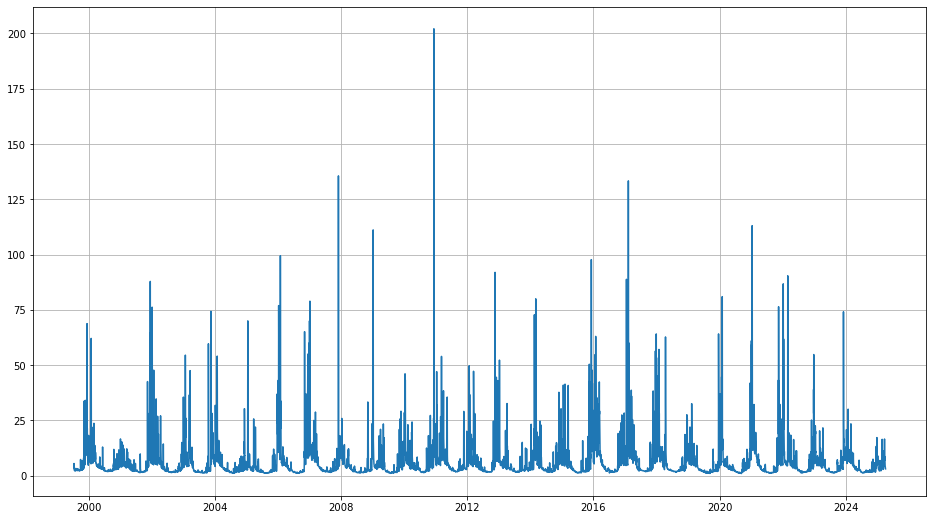

In [3]:
plt.subplots(figsize=(16,9))
plt.plot(df['Collect Date (local)'],df['Discharge (cfs)'])
plt.grid()
plt.show()

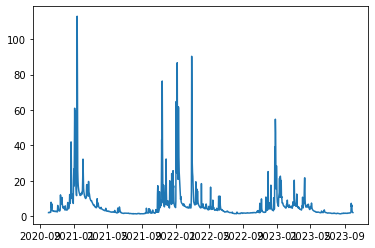

In [4]:
condition = (df['Collect Date (local)'] >= '2020-10-01') & (df['Collect Date (local)'] <= '2023-10-01')

plt.plot(df['Collect Date (local)'][condition],df['Discharge (cfs)'][condition])
# plt.plot(df['Collect Date (local)'][condition])

# Compare to Figure 2.22 in Fetter

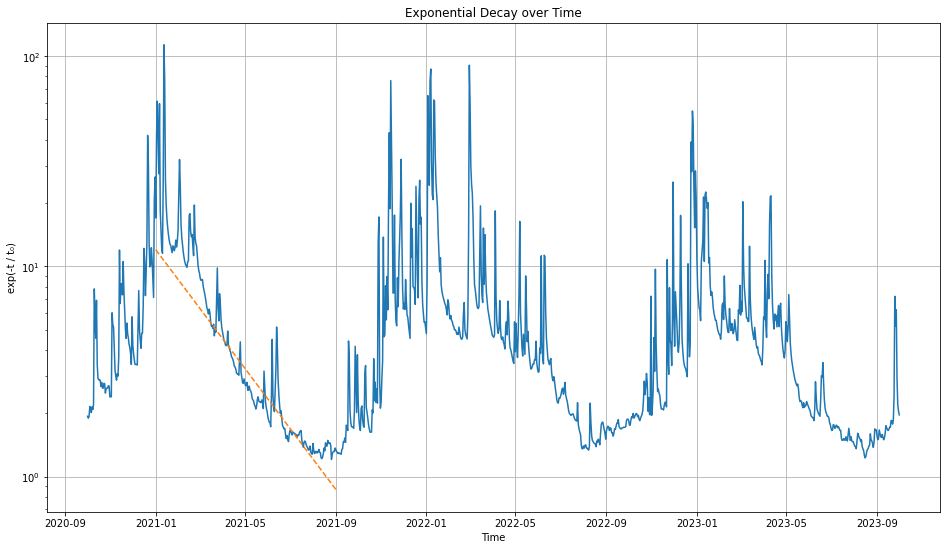

In [6]:
# Make sure your datetime column is in datetime format
df['Collect Date (local)'] = pd.to_datetime(df['Collect Date (local)'])

# Define target date
target = pd.Timestamp('2021-01-01')

# Find index of the date closest to target
i_nearest = (df['Collect Date (local)'] - target).abs().idxmin()

# Get the corresponding datetime (optional)
t0 = df.loc[i_nearest, 'Collect Date (local)']

# Compute time in seconds (or days) since t0
t_seconds = (df['Collect Date (local)'] - t0).dt.total_seconds()

# Set your decay time constant (in seconds, or match your units)
tau = 8e6  # e.g., 1 hour = 3600 seconds
Q_0 = 12

# Compute the function
y = Q_0*np.exp(-t_seconds / tau)
y[df['Collect Date (local)'] < target] = np.nan
y[df['Collect Date (local)'] > target + pd.DateOffset(months=8)] = np.nan

# Plot it
plt.subplots(figsize=(16,9))
plt.plot(df['Collect Date (local)'][condition],df['Discharge (cfs)'][condition])
plt.plot(df['Collect Date (local)'], y,'--')
plt.xlabel('Time')
plt.ylabel('exp(-t / t₀)')
plt.title('Exponential Decay over Time')
plt.yscale('log')
plt.grid(True)
plt.show()

# Calculate the baseflow
$ V = Q_0 \tau $

In [ ]:
V = Q_0 * tau
V